In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 1s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 4s 12ms/step - loss: 0.2899 - accuracy: 0.9118 - val_loss: 0.1457 - val_accuracy: 0.9531
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0997 - accuracy: 0.9698 - val_loss: 0.1083 - val_accuracy: 0.9667
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.1237 - val_accuracy: 0.9586
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0806 - val_accuracy: 0.9743
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0697 - val_accuracy: 0.9790
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0930 - val_accuracy: 0.9743
Epoch 7/10
235/235 [==============================] - 2s 10ms/ste

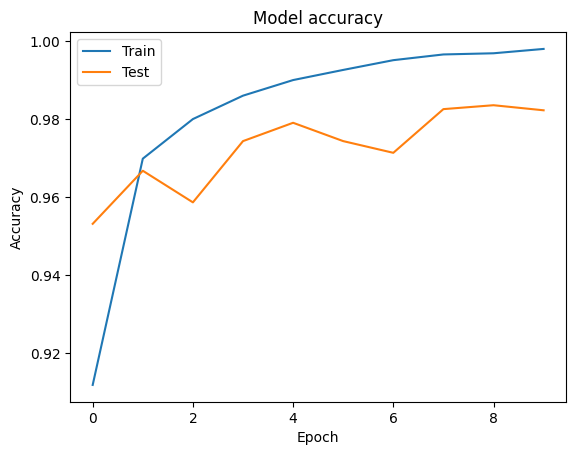

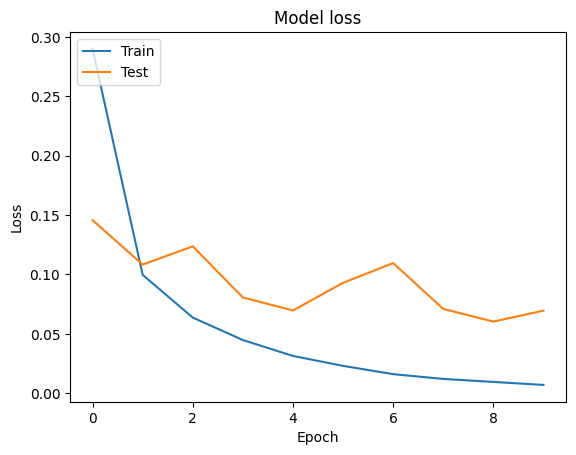

In [2]:
#Plot the loss and accuracy for both training data and validation data using the history object in the source code.
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

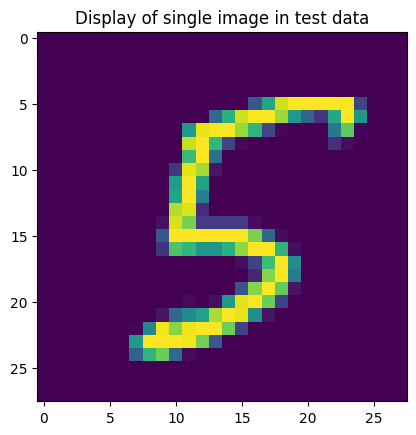

1/1 [==============================] - 0s 125ms/step

 The predicted single image in the test data is:  [[8.08351190e-19 1.02301887e-16 8.26259795e-17 5.62911218e-10
  3.84868279e-18 1.00000000e+00 7.87264188e-13 6.17713723e-21
  9.70364400e-14 7.44126982e-12]]


In [3]:
#Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

# plot the single image in the test data
plt.imshow(test_images[23].reshape(28,28))
plt.title('Display of single image in test data')
plt.show()

# get the prediction of the model on the above image in the test data
test_img_pred = model.predict(test_data[[23], :])          
print("\n The predicted single image in the test data is: ", test_img_pred)


In [4]:
#change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

Epoch 1/15
235/235 [==============================] - 6s 23ms/step - loss: 0.5002 - accuracy: 0.8545 - val_loss: 0.4804 - val_accuracy: 0.8507
Epoch 2/15
235/235 [==============================] - 5s 21ms/step - loss: 0.1660 - accuracy: 0.9497 - val_loss: 0.1472 - val_accuracy: 0.9549
Epoch 3/15
235/235 [==============================] - 4s 18ms/step - loss: 0.1030 - accuracy: 0.9674 - val_loss: 0.1110 - val_accuracy: 0.9649
Epoch 4/15
235/235 [==============================] - 4s 18ms/step - loss: 0.0732 - accuracy: 0.9769 - val_loss: 0.1376 - val_accuracy: 0.9556
Epoch 5/15
235/235 [==============================] - 4s 18ms/step - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.0838 - val_accuracy: 0.9735
Epoch 6/15
235/235 [==============================] - 4s 19ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0894 - val_accuracy: 0.9727
Epoch 7/15
235/235 [==============================] - 4s 19ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0819 - val_accuracy: 0.9771